In [82]:
import pandas as pd
from textblob import TextBlob
import csv
import re
import time
import string

In [91]:
TextBlob('I love Python').sentiment

Sentiment(polarity=0.5, subjectivity=0.6)

In [ ]:
TextBlob('I hate the spaghetti').sentiment

In [ ]:
TextBlob('Odio el spaguetti').sentiment

In [ ]:
df = pd.read_csv('javascript.csv')
df.head(3)

In [84]:
df = pd.read_csv('javascript_trad.csv')
df.head(3)

,text,eng_text
0,"Teniendo los conceptos básicos claros, impleme...","Having clear basic concepts, implementing logi..."
1,"Si quieres aprender a programar, intenta apren...","If you want to learn to program, try to learn ..."
2,"Al final me compré la cartera de #JavaScript ,...","In the end I bought the #JavaScript portfolio,..."


Limpieza de datos

In [85]:
def clean_text(text):
  text = re.sub(r'^RT[\s]+', '', text)
  text = re.sub(r'https?:\/\/.*[\r\n]*', '', text)
  text = re.sub(r'#', '', text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text)
  return text

In [86]:
df['clean_text'] = df['eng_text'].apply(clean_text)

In [87]:
df['clean_text']

0     Having clear basic concepts, implementing logi...
1     If you want to learn to program, try to learn ...
2     In the end I bought the JavaScript portfolio, ...
3     🏅🏅🏅🏅LEARN PYTHON🏅🏅🏅🏅\n💻👨🏻‍💻👨🏻‍💻👨🏻‍💻👨🏻‍ 💻\n💥💥Bo...
4     There's less to go and needoc is starting to t...
                            ...                        
64    How to do a CRUD step by step without needing ...
65               JavaScript Code - Countdown to a date 
66    And remember fellow programmers with React, Co...
67    Top story: Web development. JavaScript from sc...
68    The includes() method determines whether an ar...
Name: clean_text, Length: 69, dtype: object

In [96]:
def get_polarity(text):
  analysis = TextBlob(text).sentiment
  return analysis.polarity

In [97]:
df['polarity'] = df['clean_text'].apply(get_polarity)

In [98]:
df['polarity'].head(3)

0    0.266667
1    0.250000
2    0.000000
Name: polarity, dtype: float64

In [99]:
df[df.polarity < 0.3][['text', 'polarity']].head()

,text,polarity
0,"Teniendo los conceptos básicos claros, impleme...",0.266667
1,"Si quieres aprender a programar, intenta apren...",0.250000
2,"Al final me compré la cartera de #JavaScript ,...",0.000000
3,🏅🏅🏅🏅APRENDE PYTHON🏅🏅🏅🏅\n👨🏻‍💻👨🏻‍💻👨🏻‍💻👨🏻‍💻 INSCR...,0.000000
4,Ya queda menos y #needoc empieza a coger forma...,-0.083333


In [100]:
def x_range(x):
  if x > 0:
    return 1
  elif x == 0:
    return 0
  else:
    return -1

In [101]:
df['result'] = df['polarity'].apply(x_range)

In [102]:
df.head(3)

,text,eng_text,clean_text,polarity,result
0,"Teniendo los conceptos básicos claros, impleme...","Having clear basic concepts, implementing logi...","Having clear basic concepts, implementing logi...",0.266667,1
1,"Si quieres aprender a programar, intenta apren...","If you want to learn to program, try to learn ...","If you want to learn to program, try to learn ...",0.250000,1
2,"Al final me compré la cartera de #JavaScript ,...","In the end I bought the #JavaScript portfolio,...","In the end I bought the JavaScript portfolio, ...",0.000000,0


In [103]:
df['result'].value_counts()

result
 0    40
 1    26
-1     3
Name: count, dtype: int64

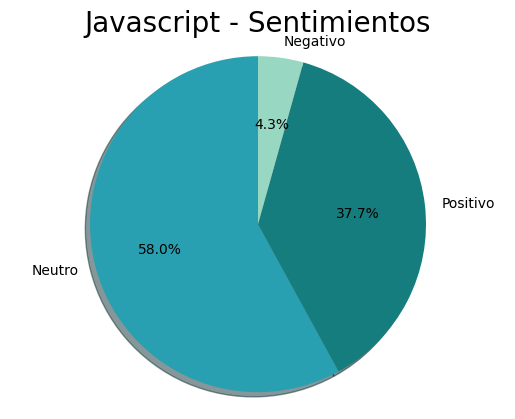

In [104]:
import matplotlib.pyplot as plt
labels = 'Neutro', 'Positivo', 'Negativo'
colors = ['#29A0B1','#167D7F','#98D7C2']
plt.pie(df['result'].value_counts(), labels = labels, colors = colors,
        autopct = '%1.1f%%', shadow = True, startangle = 90)
plt.title('Javascript - Sentimientos', fontsize = 20)
plt.axis('equal')
plt.show()

## Wordcloud

In [105]:
from wordcloud import WordCloud
text = ' '.join(df.clean_text)
text

'Having clear basic concepts, implementing logic based on good practices and understanding of…  If you want to learn to program, try to learn the basics first and not rush to handle a Frame…  In the end I bought the JavaScript portfolio, while taking a Python course\n🤣 ITGirl  🏅🏅🏅🏅LEARN PYTHON🏅🏅🏅🏅\n💻👨🏻\u200d💻👨🏻\u200d💻👨🏻\u200d💻👨🏻\u200d 💻\n💥💥Books and Course Available💥💥\n\npython…  There\'s less to go and needoc is starting to take shape 🤩\n\n_boss vue node js javascript MySQL visualstudiocode…  Live on Minecraft server Tierrasamigos 4!! Having a great time decorating the community town!! :D from chill and…  If your website has animations that could affect its performance, then this javascript plugin can help you…  ✨ New HorchataJS event! ✨\n\nWeb Scraping with JS\n🗣️ Mario Menjívar (), Software Engineer at Rapid…  JavaScript\n\nThe Spread Operator (Spread Operator) allows an expression to be expanded in situations…  JavaScript Code - Taken or Piece Sliding Puzzle  Download the source co

In [106]:
wordcloud = WordCloud(width=1024, height=800, colormap='Blues', min_font_size=14).generate(text)

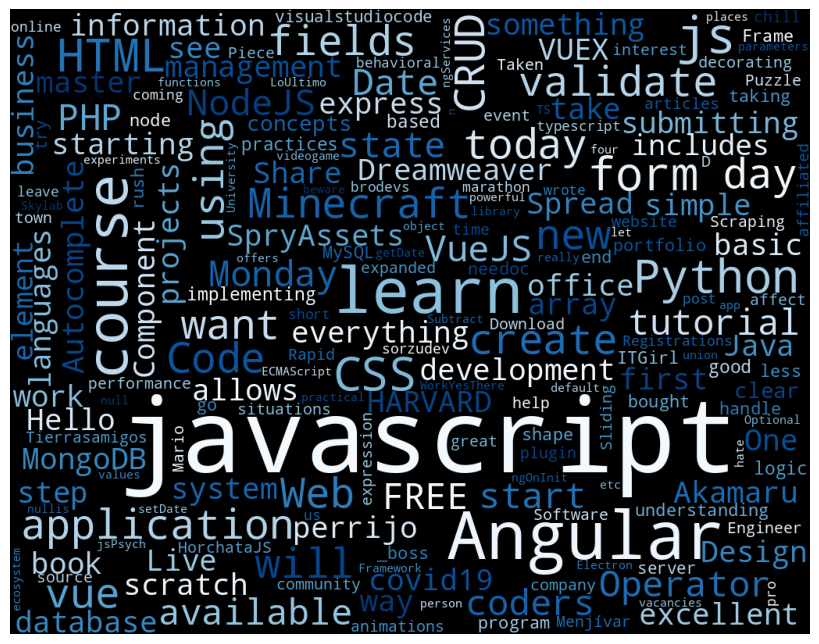

In [107]:
plt.figure(figsize= (8, 8), facecolor=None)
plt.imshow(wordcloud)
plt.axis('off')
plt.tight_layout(pad = 0)
plt.show()